In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
import sys
sys.executable

'/usr/bin/python'

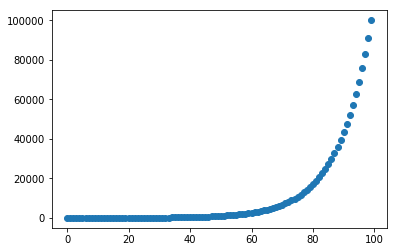

In [17]:
# calculations for log-time snapshots (verb option)
number=100
FF=np.zeros(number)
mmin=np.log10(10)
mmax=np.log10(100000)
m=mmin
for i in range(number):
    delta=(mmax-mmin)/(number-1)
    FF[i]=10**m
    m=m+delta
plt.scatter(np.arange(100),FF)  
    
    

# Compiler flags for debug

In [ ]:
gfortran -g -fbacktrace -ffpe-trap=zero,overflow,underflow sistemasII.f 

# hacer_animacion.py

In [ ]:
# correr como python hacer_animacion.py archivo.txt
# tiene que estar en la misma carpeta 
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
#filename=sys.argv[1]
filename="pert50M01a.txt"
print filename
command = 'awk \'{{print $1}}\' {} | uniq -c > indices.txt'.format(filename)
os.system(command)
ind=np.loadtxt('indices.txt',skiprows=1)
rawdata=np.loadtxt(filename,skiprows=1)
#it,t,a(i),emegas(i),emepla(i)/5.7d27,rplanet(i),amax,amin,emestar,rc,qest,sigmag_0
# ind=0, time = 1, sma=2,gasmass/earthmass= 3, mass/earthmass= 4,  radius=5 
ncols=6
myrange=len(ind)
figure_list = ''
ii=0
trange=int(ind[:myrange,0].sum())
radmax=rawdata[:trange,5].max()
radmax2=rawdata[:,5].max()
#eradcm=6.37e8
eradcm=1
tming=5e6
mming=15
figure_list2 = ''
giant=False
if rawdata[:,4].max() > mming:
    giant=True
for j in np.arange(myrange):
    plt.xlim(0,rawdata[:trange,2].max()+0.2)
# cambiar aqui para tener eje y segun el planeta mas grande o fijo
    plt.ylim(0,rawdata[:trange,4].max()+0.2)
    plt.ylim(0,3)
    data=np.zeros((int(ind[j,0]),ncols))
    for i in range(int(ind[j,0])):
        for k in range(ncols):
            data[i,k]=rawdata[ii,k]
        ii=ii+1
    plt.scatter(data[:,2],data[:,4],s=100*data[:,5],c=data[:,5]/eradcm,cmap='cubehelix',vmin=0,vmax=radmax/eradcm)   
    plt.colorbar(label=r'Planet radius ($R_\oplus$)');
    plt.xlabel('Semi-major axis (AU)')
    plt.ylabel(r'Planet mass ($M_\oplus$)')
    plt.title('Time = %.1e yr' % data[i,1])
    figure_name='plot%06d.png' % j
    plt.savefig(figure_name)
    figure_list = figure_list + ' {} '.format(figure_name)
    plt.close() 
    if giant and (data[0,1] > tming):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax2=ax.scatter(data[:,2],data[:,4],s=100*data[:,5],c=data[:,5]/eradcm,cmap='cubehelix',vmin=0,vmax=radmax2/eradcm)   
        fig.colorbar(ax2,label=r'Planet radius ($R_\oplus$)')
        ax.set_xlim(0,rawdata[:trange,2].max()/2.)
        ax.set_ylim(0,rawdata[:trange,4].max()+2)
        ax.set_xlabel('Semi-major axis (AU)')
        ax.set_ylabel(r'Planet mass ($M_\oplus$)')
        ax.set_title('Time = %.1e yr' % data[i,1])
        figure_name2='gplot%06d.png' % j
        fig.savefig(figure_name2)
        figure_list2 = figure_list2 + ' {} '.format(figure_name2)
        plt.close()
for i in range(15):    
    figure_list = figure_list+ ' {} '.format(figure_name)  
if giant and (data[0,1] > tming):    
	for i in range(15):    
	    figure_list2 = figure_list2+ ' {} '.format(figure_name2)  
	command2 = 'convert -delay 10 -loop 0 {}'.format(figure_list2)+' ganimation_{}.gif'.format(filename[:-4])
	os.system(command2)

command = 'convert -delay 10 -loop 0 {}'.format(figure_list)+' animation_{}.gif'.format(filename[:-4])
os.system(command)
command = 'rm *.png'
os.system(command)
command = 'rm indices.txt'
os.system(command)

# Consolidados por cada sistema

Esto era para una grilla de parametros de perturbacion en A y f. Hay que reescribir el codigo para hacer consolidados individuales.

In [2]:
%matplotlib inline

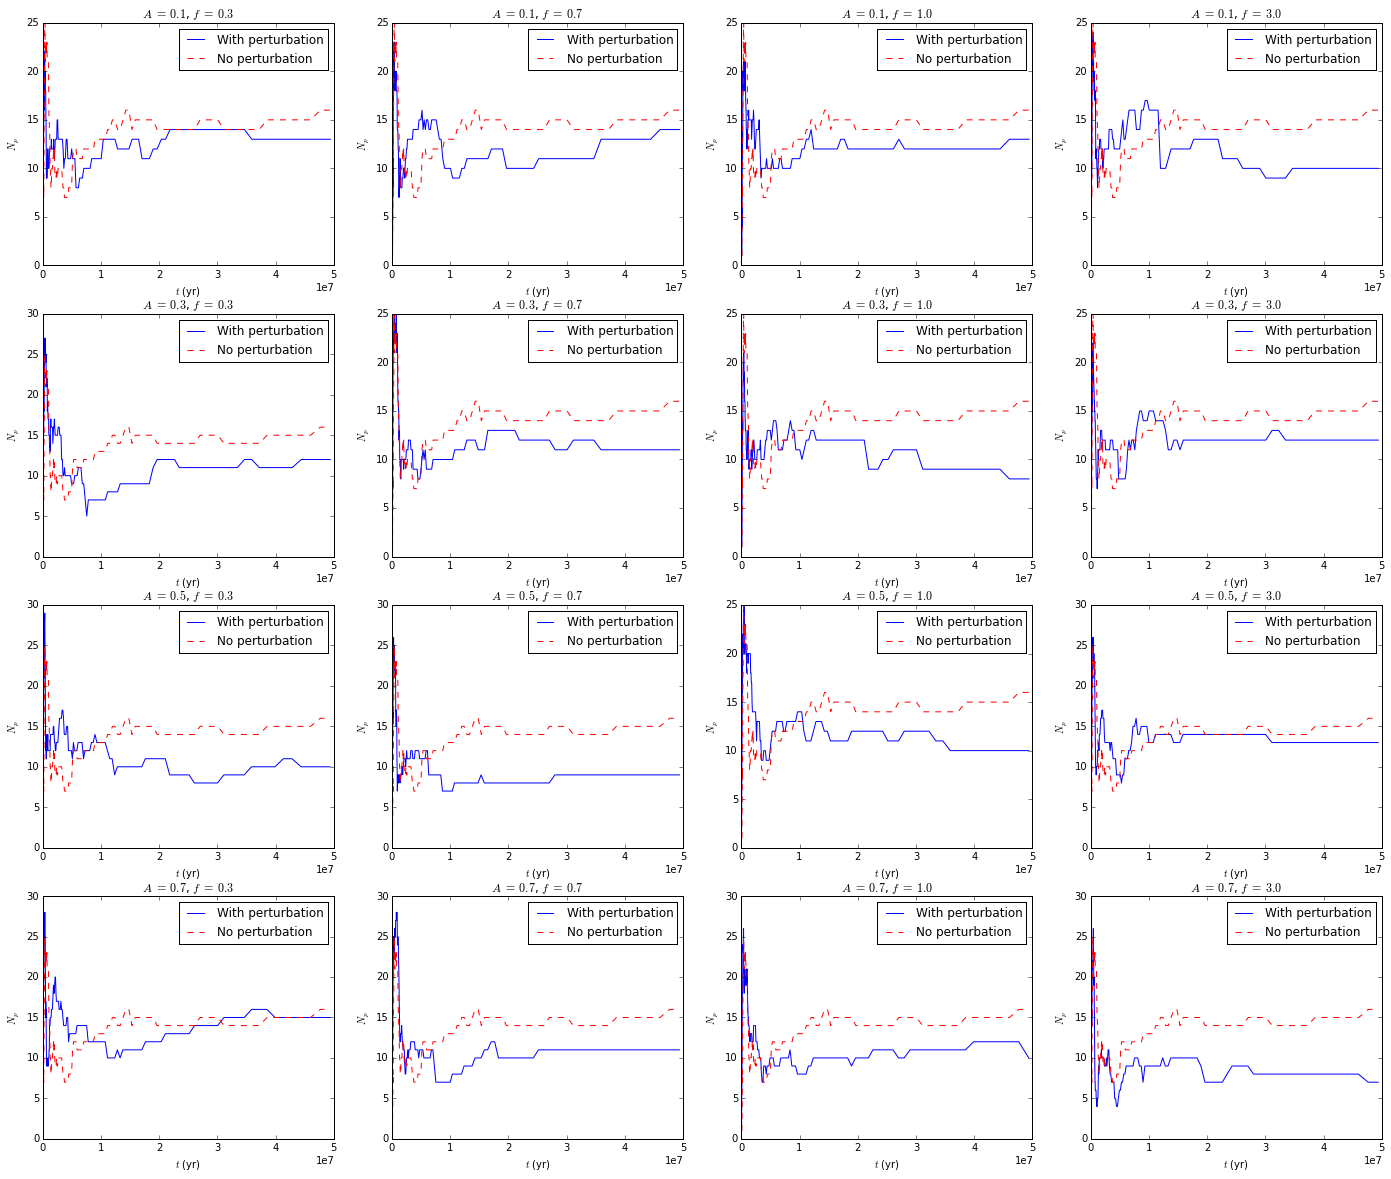

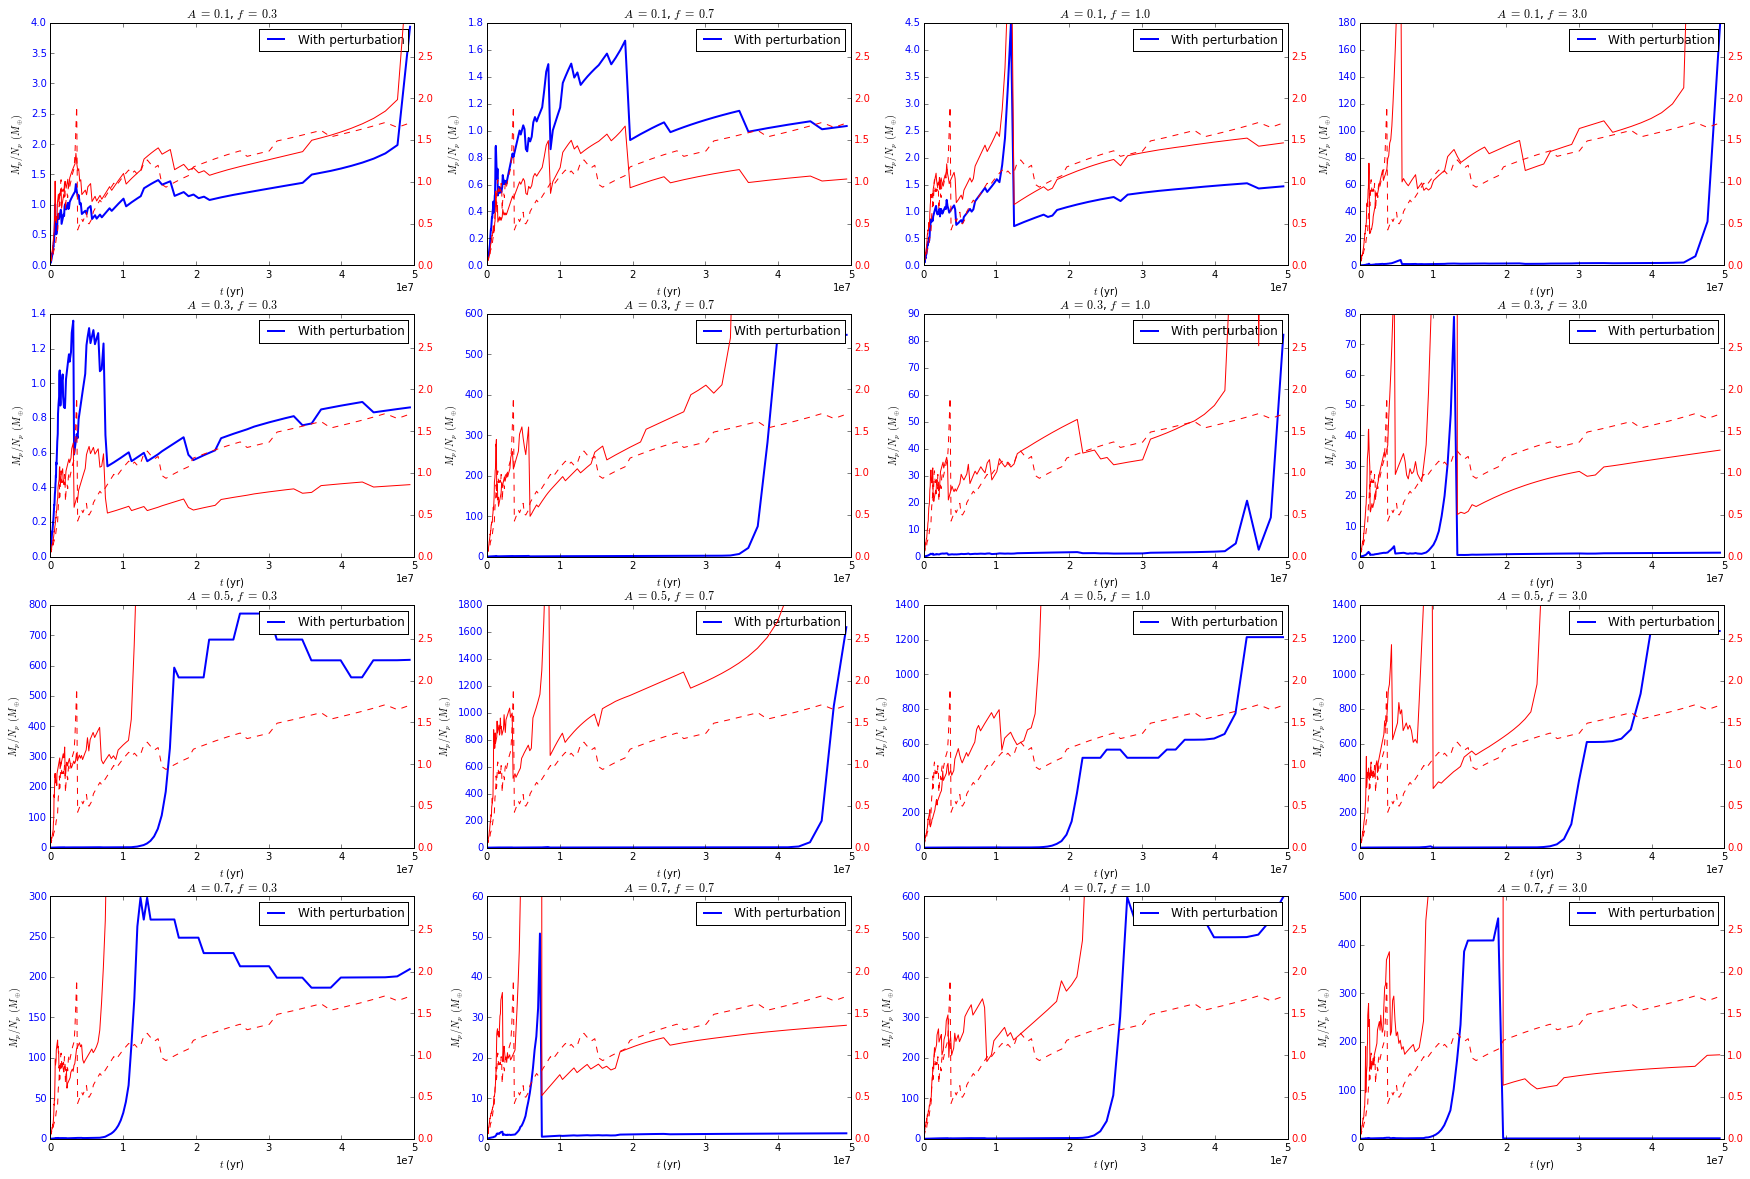

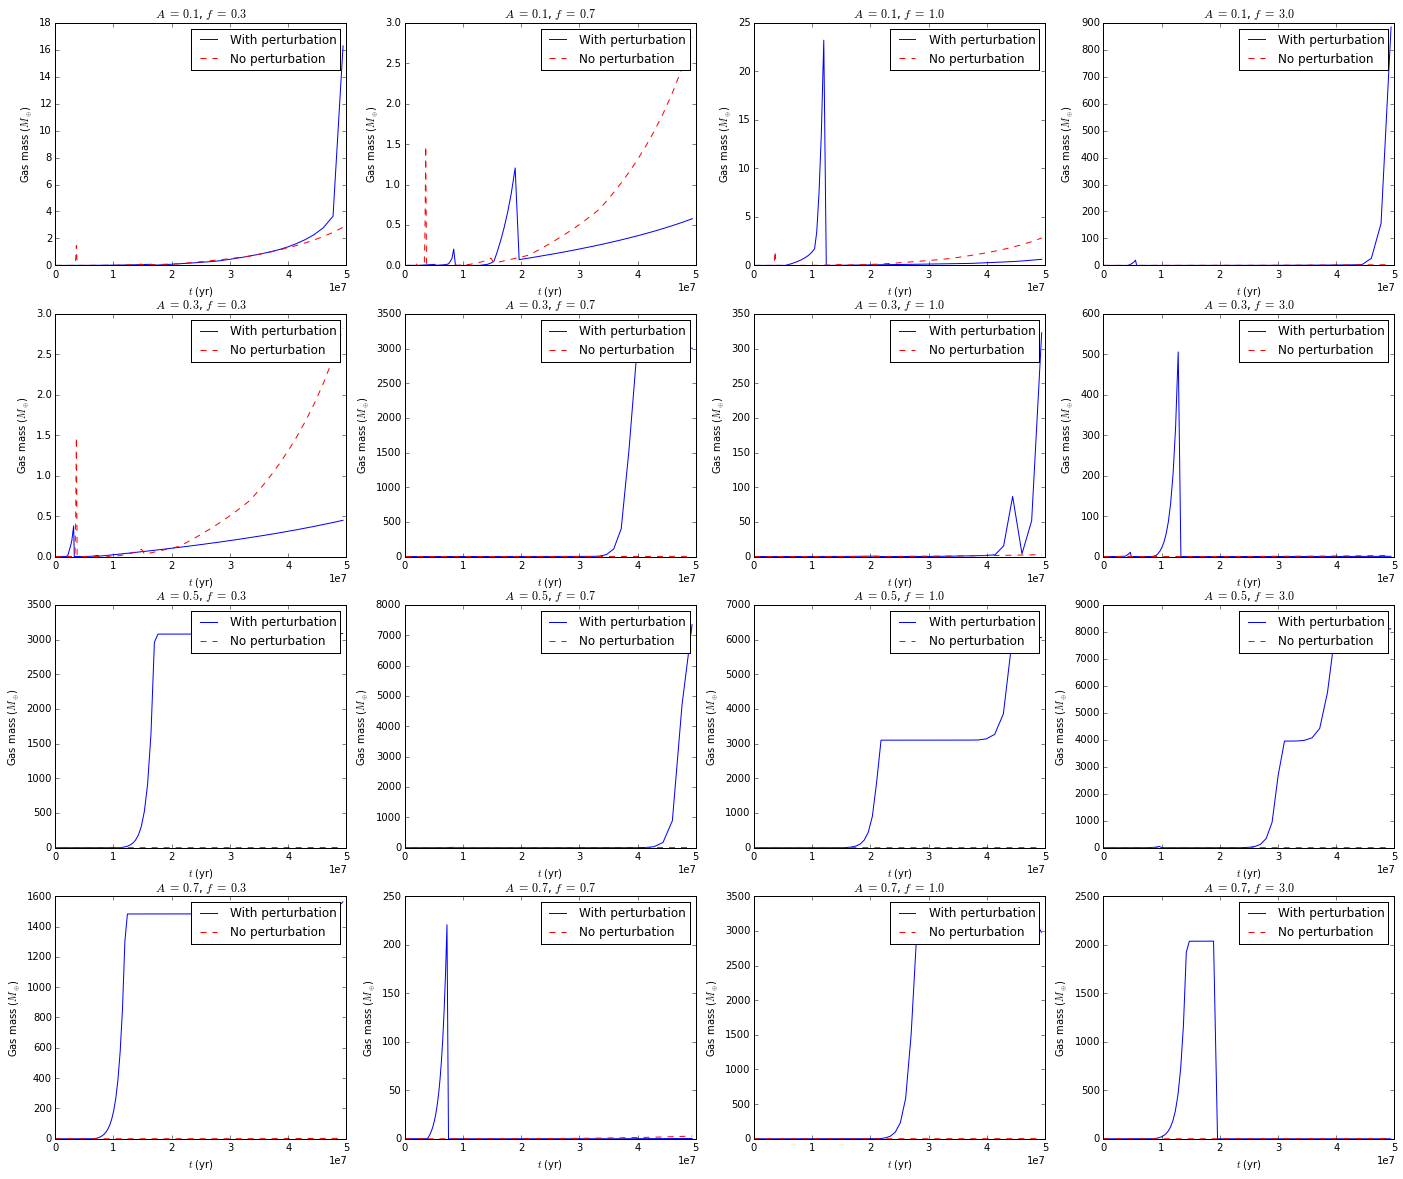

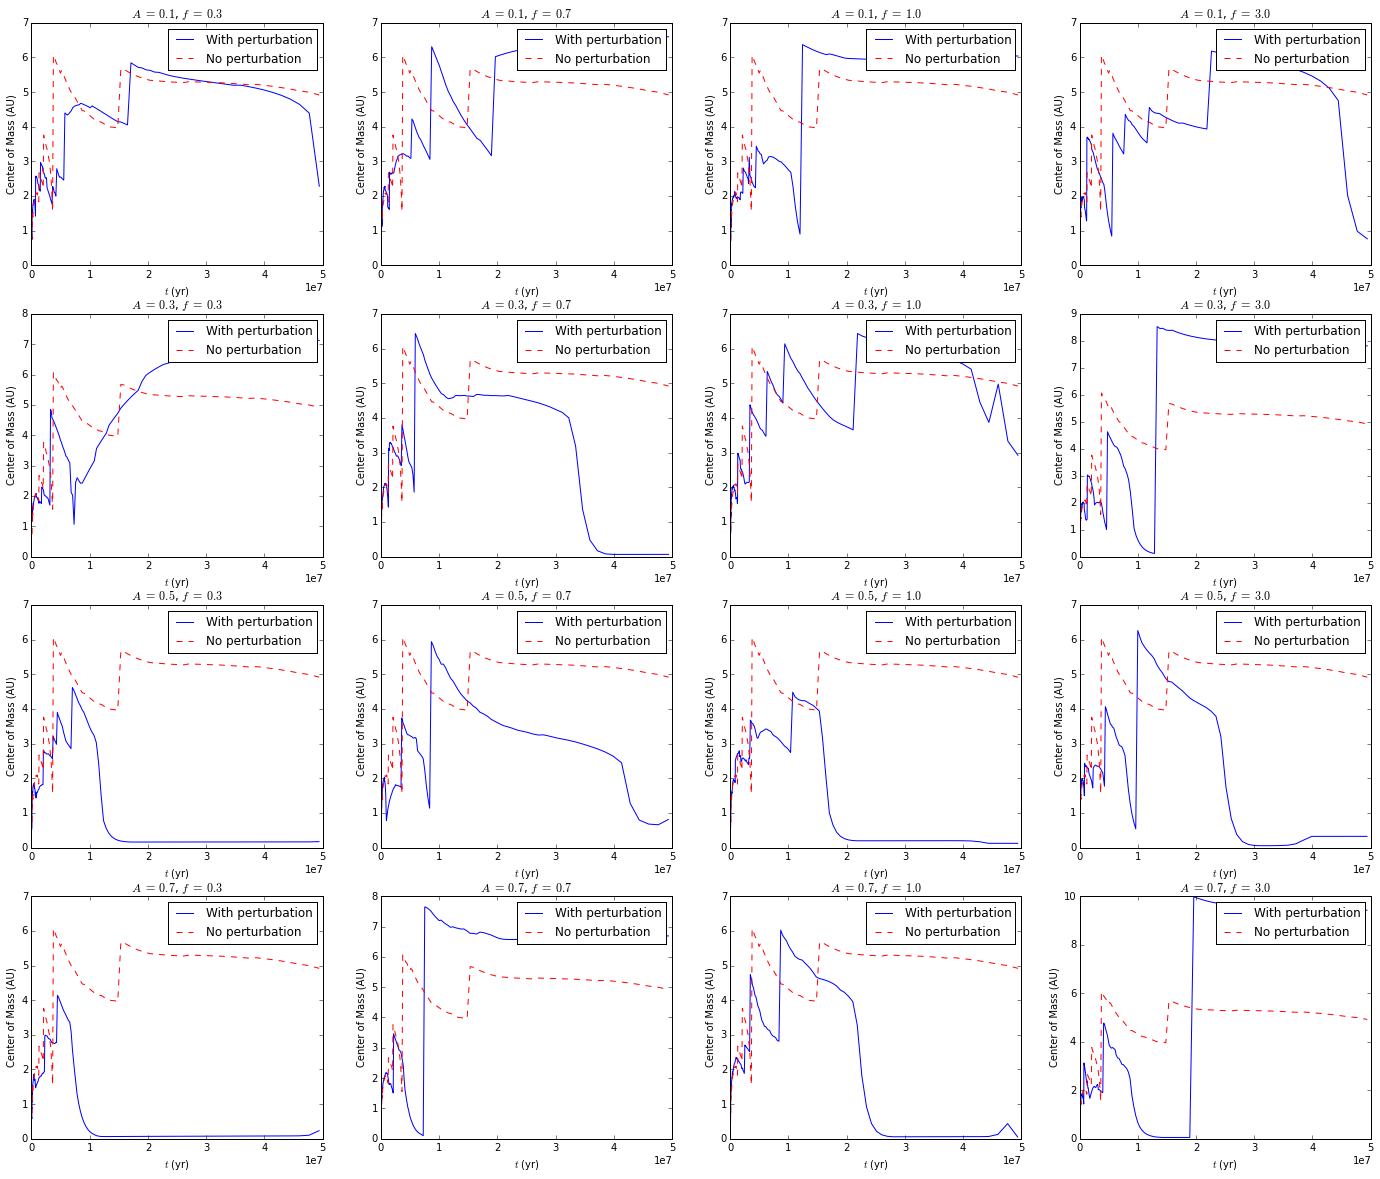

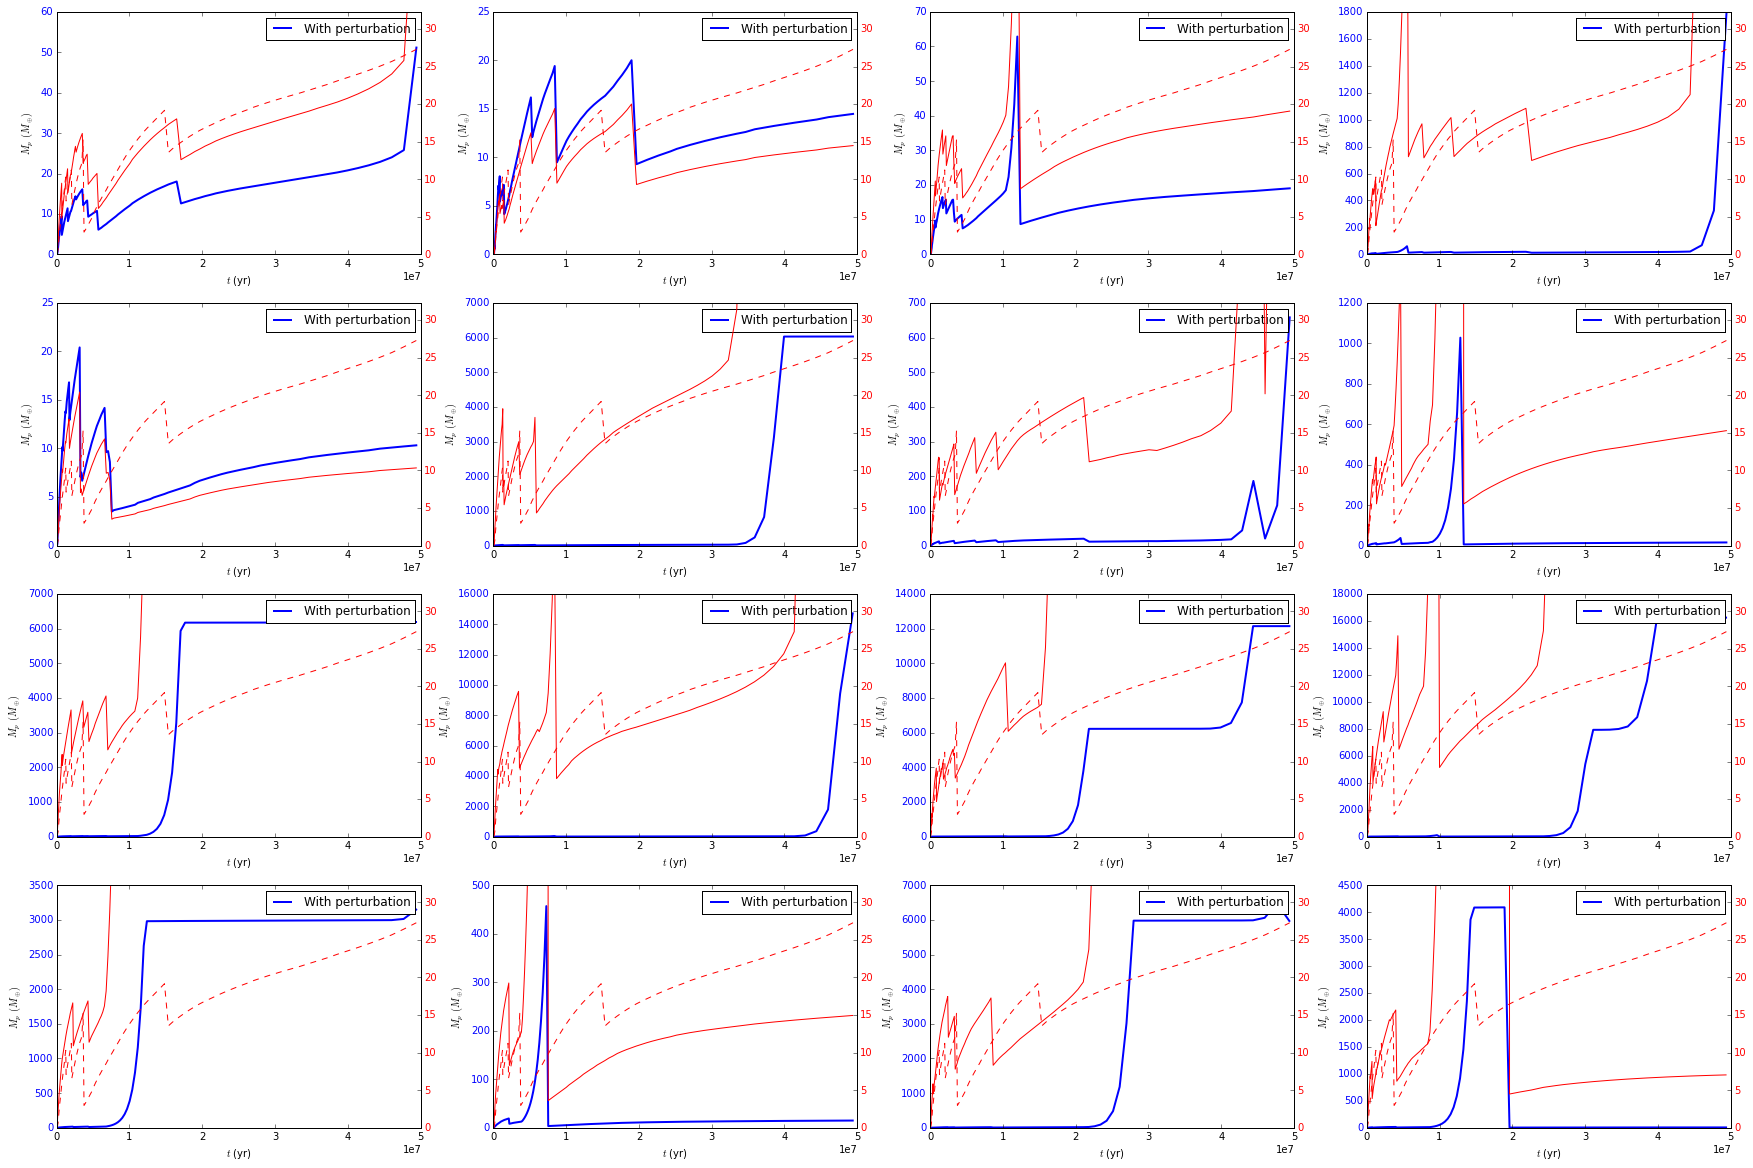

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize=(24,20))
fig2 = plt.figure(figsize=(30,20))
fig3 = plt.figure(figsize=(24,20))

fig4 = plt.figure(figsize=(24,20))
fig5 = plt.figure(figsize=(30,20))

Alist=np.array([0.1,0.3,0.5,0.7])
flist=np.array([0.3,0.7,1.,3.])
XX, YY = np.meshgrid(Alist, flist)
XX=XX.T
YY=YY.T
filename="Original50mopt5.txt"
command = 'awk \'{{print $1}}\' {} | uniq -c > indices.txt'.format(filename)
os.system(command)
ind=np.loadtxt('indices.txt',skiprows=1)
rawdata=np.loadtxt(filename,skiprows=1)
ncols=6
myrange=len(ind)
#myrange=200
figure_list = ''
ii=0
trange=int(ind[:myrange,0].sum())
radmax=rawdata[:trange,5].max()
eradcm=6.37e8
armass=[]
agmass=[]
acmass=[]
anplan=[]
atime=[]
for j in np.arange(myrange):
    data=np.zeros((int(ind[j,0]),ncols))
    for i in range(int(ind[j,0])):
        for k in range(ncols):
            data[i,k]=rawdata[ii,k]
        ii=ii+1
    rmass=data[:,4].sum()      #rocky mass
    gmass=data[:,3].sum()    #gas mass
    cmass=(data[:,2]*(data[:,4]+data[:,3])).sum()/(rmass+gmass)     # center of mass
    nplan=len(data)*1.
    armass.append(rmass)
    agmass.append(gmass)
    acmass.append(cmass)
    anplan.append(nplan)
    atime.append(data[0,1])
armass=np.asarray(armass)
agmass=np.asarray(agmass)
acmass=np.asarray(acmass)
anplan=np.asarray(anplan)
atime=np.asarray(atime)
armass2=armass
agmass2=agmass
acmass2=acmass
anplan2=anplan
atime2=atime
for kl in range(1,17):
    filename = "pert50M%02da.txt" % kl
#    filename="perturbacion01.txt"
    command = 'awk \'{{print $1}}\' {} | uniq -c > indices.txt'.format(filename)
    os.system(command)
    ind=np.loadtxt('indices.txt',skiprows=1)
    rawdata=np.loadtxt(filename,skiprows=1)
    ncols=6
    myrange=len(ind)
    #myrange=200
    figure_list = ''
    ii=0
    trange=int(ind[:myrange,0].sum())
    radmax=rawdata[:trange,5].max()
    eradcm=6.37e8
    armass=[]
    agmass=[]
    acmass=[]
    anplan=[]
    atime=[]
    for j in np.arange(myrange):
        data=np.zeros((int(ind[j,0]),ncols))
        for i in range(int(ind[j,0])):
            for k in range(ncols):
                data[i,k]=rawdata[ii,k]
            ii=ii+1
        rmass=data[:,4].sum()      #rocky mass
        gmass=data[:,3].sum()    #gas mass
        cmass=(data[:,2]*(data[:,4]+data[:,3])).sum()/(rmass+gmass)     # center of mass
        nplan=len(data)*1.
        armass.append(rmass)
        agmass.append(gmass)
        acmass.append(cmass)
        anplan.append(nplan)
        atime.append(data[0,1])
    armass=np.asarray(armass)
    agmass=np.asarray(agmass)
    acmass=np.asarray(acmass)
    anplan=np.asarray(anplan)
    atime=np.asarray(atime)
    
    intmass=armass+agmass
    intmass2=armass2+agmass2
    ax = fig.add_subplot(4,4,kl)
    ax.plot(atime,anplan,label="With perturbation") #this one side to side with the next two-in one
    ax.plot(atime2,anplan2,'r--',label="No perturbation")
    ax.set_xlabel(r'$t$ (yr)' )
    ax.set_ylabel(r'$N_p$' )
    ax.set_title(r'$A\ =\ %.1f$, $f\ =\ %.1f$'%(np.reshape(XX,16)[kl-1],np.reshape(YY,16)[kl-1]))
    figure_name1="r_nplanet.png"
    ax.legend()
    fig.savefig(figure_name1)

    ax2 = fig2.add_subplot(4,4,kl)
    ax2.plot(atime,(intmass)/anplan,lw=2,label="With perturbation")
    ax2.set_xlabel(r'$t$ (yr)' )
    ax2.set_ylabel(r'$M_p/N_p\ (M_\oplus)$' )
    ax2.set_title(r'$A\ =\ %.1f$, $f\ =\ %.1f$'%(np.reshape(XX,16)[kl-1],np.reshape(YY,16)[kl-1]))
    for tl in ax2.get_yticklabels():
        tl.set_color('b')
    axx2 = ax2.twinx()
    axx2.plot(atime,intmass/anplan,c='r',label="With perturbation")    
    axx2.plot(atime2,intmass2/anplan2,'r--',label="No perturbation")
    axx2.set_ylim(0,(intmass2/anplan2).max()+1)
    for tl in axx2.get_yticklabels():
        tl.set_color('r')
    figure_name2="r_movernplanet.png"
    ax2.legend()
    fig2.savefig(figure_name2)
        
    ax3=fig3.add_subplot(4,4,kl)
    ax3.plot(atime,agmass,label="With perturbation")
    ax3.plot(atime2,agmass2,'r--',label="No perturbation")    
    ax3.set_xlabel(r'$t$ (yr)' )
    ax3.set_ylabel(r'Gas mass ($M_\oplus$)' )
    ax3.set_xlim(0,5e7)
    ax3.set_title(r'$A\ =\ %.1f$, $f\ =\ %.1f$'%(np.reshape(XX,16)[kl-1],np.reshape(YY,16)[kl-1]))
    figure_name3="r_mgas.png"
    ax3.legend()
    fig3.savefig(figure_name3)

    ax4 = fig4.add_subplot(4,4,kl)
    ax4.plot(atime,acmass,label="With perturbation")
    ax4.plot(atime2,acmass2,'r--',label="No perturbation")    
    ax4.set_xlabel(r'$t$ (yr)' )
    ax4.set_ylabel(r'Center of Mass (AU)' )
    ax4.set_xlim(0,5e7)
    ax4.set_title(r'$A\ =\ %.1f$, $f\ =\ %.1f$'%(np.reshape(XX,16)[kl-1],np.reshape(YY,16)[kl-1]))
    figure_name4="r_centerofmass.png"
    ax4.legend()
    fig4.savefig(figure_name4)
    
    ax5 = fig5.add_subplot(4,4,kl)
    ax5.plot(atime,intmass,lw=2,label="With perturbation")
    ax5.set_xlabel(r'$t$ (yr)')
    ax5.set_ylabel(r'$M_p$ $(M_\oplus)$')
    for tl in ax5.get_yticklabels():
        tl.set_color('b')
    axx2 = ax5.twinx()
    axx2.plot(atime,intmass,c='r',label="With perturbation")    
    axx2.plot(atime2,intmass2,'r--',label="No perturbation")
    axx2.set_ylim(0,intmass2.max()+5)
    for tl in axx2.get_yticklabels():
        tl.set_color('r')
    figure_name5="r_mplanet.png"
    ax5.legend()
    fig5.savefig(figure_name5)

In [33]:
# ind=0, time = 1, sma=2,gasmass= 3, mass/earthmass= 4,  radius=5 
rmass=data[:,4].sum()      #rocky mass
rgmass=data[:,4].sum()+data[:,3].sum()/5.e27      #rocky+gas mass
cmass=(data[:,2]*(data[:,4]+data[:,3]/5.e27)).sum()/rgmass      # center of mass
nplan=len(data)


12


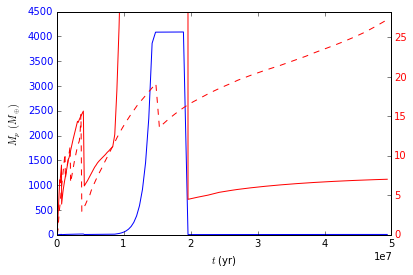

In [26]:
intmass=armass+agmass
intmass2=armass2+agmass2
ss,axx1=plt.subplots()
axx1.plot(atime,intmass)
axx1.set_xlabel(r'$t$ (yr)')
axx1.set_ylabel(r'$M_p$ $(M_\oplus)$')
for tl in axx1.get_yticklabels():
    tl.set_color('b')
axx2 = axx1.twinx()
axx2.plot(atime,intmass,c='r')    
axx2.plot(atime2,intmass2,'r--')
axx2.set_ylim(0,intmass2.max()+1)
for tl in axx2.get_yticklabels():
    tl.set_color('r')

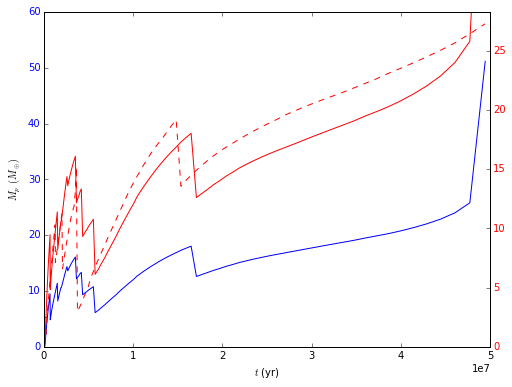

In [37]:
intmass=armass+agmass
intmass2=armass2+agmass2
fig = plt.figure(figsize=(8,6))
axx1 = fig.add_subplot(1,1,1)
axx1.plot(atime,intmass)
axx1.set_xlabel(r'$t$ (yr)')
axx1.set_ylabel(r'$M_p$ $(M_\oplus)$')
for tl in axx1.get_yticklabels():
    tl.set_color('b')
axx2 = axx1.twinx()
axx2.plot(atime,intmass,c='r')    
axx2.plot(atime2,intmass2,'r--')
axx2.set_ylim(0,intmass2.max()+1)
for tl in axx2.get_yticklabels():
    tl.set_color('r')

# Analysis of Legacy Input

In [2]:
AAA=np.loadtxt("../legacy_input/discos-estables-gama1.dat")

In [43]:
AAA[0]

array([  0.1009214 ,  58.23233   ,   0.79615109,   2.0325427 ])

In [44]:
AAA.shape

(3078, 4)

(array([ 349.,  708.,  572.,  501.,  371.,  287.,  147.,   84.,   38.,   21.]),
 array([ 0.007722  ,  0.04068452,  0.07364704,  0.10660956,  0.13957208,
         0.1725346 ,  0.20549712,  0.23845964,  0.27142216,  0.30438468,
         0.3373472 ]),
 <a list of 10 Patch objects>)

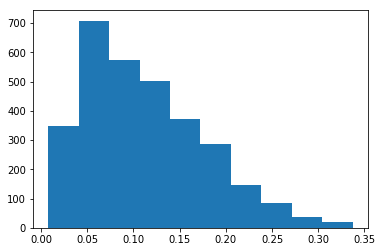

In [45]:
plt.hist(AAA[:,0]) # disk mass fraction in solar masses

In [14]:
AAA[AAA[:,0]<0.01]

array([[  7.72200430e-03,   3.80233800e+01,   1.34967464e+00,
          4.50325458e+01]])

(array([  59.,  325.,  695.,  822.,  587.,  331.,  173.,   62.,   18.,    6.]),
 array([  28.59797 ,   35.893043,   43.188116,   50.483189,   57.778262,
          65.073335,   72.368408,   79.663481,   86.958554,   94.253627,
         101.5487  ]),
 <a list of 10 Patch objects>)

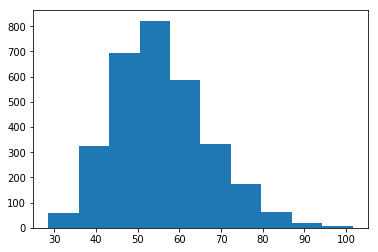

In [46]:
plt.hist(AAA[:,1]) # rc

(array([ 341.,  338.,  347.,  334.,  327.,  297.,  293.,  261.,  281.,  259.]),
 array([ 0.70059004,  0.77050381,  0.84041759,  0.91033136,  0.98024513,
         1.0501589 ,  1.12007267,  1.18998644,  1.25990021,  1.32981398,
         1.39972775]),
 <a list of 10 Patch objects>)

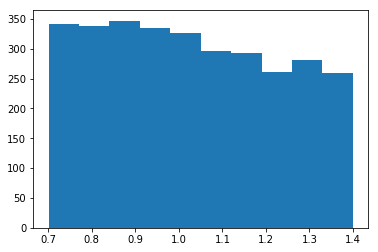

In [63]:
plt.hist(AAA[:,2]) #stellar mass

(array([  2.57400000e+03,   3.80000000e+02,   7.30000000e+01,
          3.10000000e+01,   9.00000000e+00,   8.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00042186,   5.40363425,   9.80684664,  14.21005903,
         18.61327143,  23.01648382,  27.41969621,  31.8229086 ,
         36.226121  ,  40.62933339,  45.03254578]),
 <a list of 10 Patch objects>)

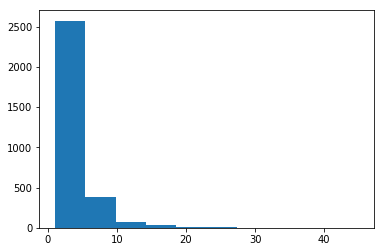

In [49]:
plt.hist(AAA[:,3]) # q

In [51]:
tau=np.loadtxt("../legacy_input/taugas.dat")

(array([  980.,  1026.,  1039.,   991.,   969.,   971.,  1015.,  1001.,
          987.,  1021.]),
 array([ 6.00003594,  6.10002112,  6.2000063 ,  6.29999148,  6.39997667,
         6.49996185,  6.59994703,  6.69993222,  6.7999174 ,  6.89990258,
         6.99988776]),
 <a list of 10 Patch objects>)

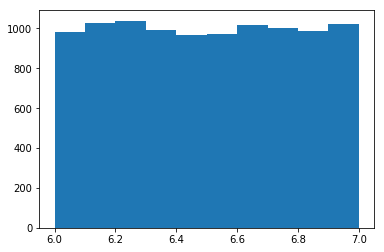

In [52]:
plt.hist(np.log10(tau))

In [53]:
metal=np.loadtxt("../legacy_input/metal-normal.dat")

(array([   2.,   19.,   70.,  144.,  268.,  255.,  185.,  113.,   20.,    8.]),
 array([-0.7469846 , -0.60559016, -0.46419573, -0.32280129, -0.18140686,
        -0.04001242,  0.10138202,  0.24277645,  0.38417089,  0.52556533,
         0.66695976]),
 <a list of 10 Patch objects>)

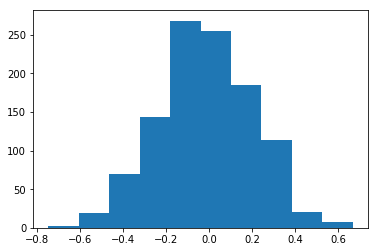

In [54]:
plt.hist(metal)

# Analysis of Q values

In [56]:
BBB=np.loadtxt("../legacy_input/discos-estables-gama15.dat")

In [57]:
CCC=np.loadtxt("../legacy_input/discos-estables-gama05.dat")

[0, 20, 0, 20]

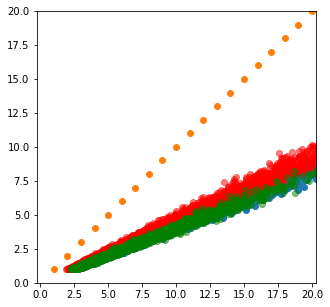

In [74]:
cqa=np.array([])
cq=np.array([])
cqc=np.array([])
gamma=1
for i in range(AAA.shape[0]):
    ac=AAA[i,1]
    ms=AAA[i,2]
    md=AAA[i,0]
    amin=ac*((7./4.-gamma)/(2.-gamma))**(1./(2.-gamma))
    sigmag=(2.-gamma)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    cqa=np.append(cqa,1.24e5*(amin**(gamma-7./4.))*(ac**(-gamma))*(ms)*np.exp((amin/ac)**(2.-gamma))/sigmag)
gamma=1.5
for i in range(BBB.shape[0]):
    ac=BBB[i,1]
    ms=BBB[i,2]
    md=BBB[i,0]
    amin=ac*((7./4.-gamma)/(2.-gamma))**(1./(2.-gamma))
    sigmag=(2.-gamma)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    cq=np.append(cq,1.24e5*(amin**(gamma-7./4.))*(ac**(-gamma))*(ms)*np.exp((amin/ac)**(2.-gamma))/sigmag)
gamma=0.5
for i in range(CCC.shape[0]):
    ac=CCC[i,1]
    ms=CCC[i,2]
    md=CCC[i,0]
    amin=ac*((7./4.-gamma)/(2.-gamma))**(1./(2.-gamma))
    sigmag=(2.-gamma)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    cqc=np.append(cqc,1.24e5*(amin**(gamma-7./4.))*(ac**(-gamma))*(ms)*np.exp((amin/ac)**(2.-gamma))/sigmag)
plt.figure(figsize=(5,5))
plt.scatter(cqa,AAA[:,3])
plt.scatter(cq,BBB[:,3],c='r',alpha=0.5)
plt.scatter(cqc,CCC[:,3],c='g',alpha=0.5)
x=np.linspace(1,20,20)
plt.scatter(x,x)
plt.axis('equal')
plt.axis([0,20,0,20])

[0, 5, 0, 5]

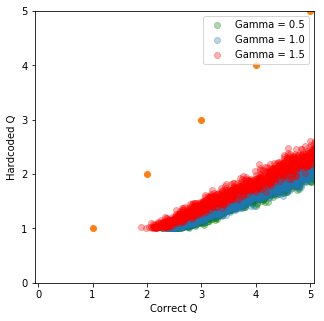

In [97]:
plt.figure(figsize=(5,5))
plt.scatter(cqc,CCC[:,3],c='g',alpha=0.3,label="Gamma = 0.5")
plt.scatter(cqa,AAA[:,3],alpha=0.3,label="Gamma = 1.0")
plt.scatter(cq,BBB[:,3],c='r',alpha=0.3,label="Gamma = 1.5")

x=np.linspace(1,20,20)
plt.scatter(x,x)
plt.xlabel("Correct Q")
plt.ylabel("Hardcoded Q")
plt.legend()
plt.axis('equal')
plt.axis([0,5,0,5])

In [84]:
qa=np.array([])
gamma=1
for i in range(AAA.shape[0]):
    ac=AAA[i,1]
    ms=AAA[i,2]
    md=AAA[i,0]
    amin=ac*((7./4.-gamma)/(2.-gamma))**(1./(2.-gamma))
    sigmag=(2.-gamma)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    qa=np.append(qa,1.24e5*(amin**(gamma-2.))*(ac**(-gamma))*(ms)*np.exp((amin/ac)**(2.-gamma))/sigmag)
# exponente en q no se toma como 7/4 sino 2

In [85]:
q=np.array([])
gamma=1.5
for i in range(BBB.shape[0]):
    ac=BBB[i,1]
    ms=BBB[i,2]
    md=BBB[i,0]
    amin=ac*((2.-gamma)/(2.-gamma))**(1./(2-gamma)) #aqui también el exponente se toma como 2
    sigmag=(2.-gamma)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    q=np.append(q,1.24e5*(amin**(gamma-2))*(ac**(-gamma))*(ms)*np.exp((amin/ac)**(2.-gamma))/sigmag)
# exponente en q no se toma como 7/4 sino 2

In [86]:
qc=np.array([])
gamma=0.5
for i in range(CCC.shape[0]):
    ac=CCC[i,1]
    ms=CCC[i,2]
    md=CCC[i,0]
    amin=ac*((7/4.-gamma)/(2.-gamma))**(1./(2-gamma))
    sigmag=(2.-gamma)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    qc=np.append(qc,1.24e5*(amin**(gamma-2))*(ac**(-gamma))*(ms)*np.exp((amin/ac)**(2.-gamma))/sigmag)
# exponente en q no se toma como 7/4 sino 2

[0, 5, 0, 5]

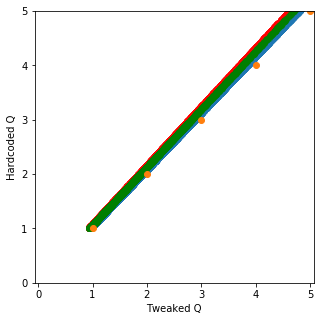

In [96]:
plt.figure(figsize=(5,5))
plt.scatter(qa,AAA[:,3])
plt.scatter(q,BBB[:,3],c='r',alpha=0.5)
plt.scatter(qc,CCC[:,3],c='g',alpha=0.5)
plt.xlabel("Tweaked Q")
plt.ylabel("Hardcoded Q")
x=np.linspace(1,50,50)
plt.scatter(x,x)
plt.axis('equal')
plt.axis([0,5,0,5])

# Generate parameter.in from Yamila's original input file

In [111]:
AAA=AAA[:metal.shape[0]]

In [112]:
tau=tau[:metal.shape[0]]

In [ ]:
f = open('parameters.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n")

In [145]:
gama=np.ones(metal.shape[0])
cmigI=np.ones(metal.shape[0])*0.1
Apert=np.ones(metal.shape[0])*0.
Fpert=np.ones(metal.shape[0])*1.
Tfin=np.ones(metal.shape[0])*3.e7
Verb=False

In [146]:
params=np.vstack((AAA[:,0:3].T,metal,tau,gama,cmigI,Apert,Fpert,Tfin)).T

In [148]:
f = open('parameters.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n")
for i in range(len(params)):
        f.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%(tuple(params[i])+(Verb,))) 
f.close()


# Generating a Yamila-like parameter.in

(array([  2.19600000e+03,   6.03000000e+02,   1.74000000e+02,
          6.00000000e+01,   2.80000000e+01,   9.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([ 0.00910139,  0.19885259,  0.38860378,  0.57835498,  0.76810618,
         0.95785737,  1.14760857,  1.33735977,  1.52711096,  1.71686216,
         1.90661336]),
 <a list of 10 Patch objects>)

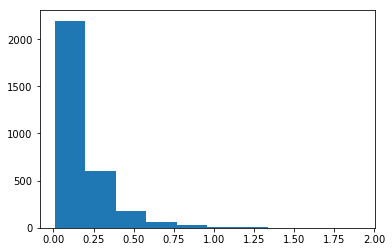

In [196]:
# disk mass
np.random.seed(0)
mu_md, sigma_md = -2.05, 0.85 # mean and standard deviation
s_md = np.random.lognormal(mu_md, sigma_md, AAA.shape[0])
plt.hist(s_md)

(array([  96.,  503.,  964.,  847.,  438.,  177.,   40.,    7.,    4.,    2.]),
 array([ 25.34029101,  31.92164461,  38.50299822,  45.08435183,
         51.66570543,  58.24705904,  64.82841264,  71.40976625,
         77.99111986,  84.57247346,  91.15382707]),
 <a list of 10 Patch objects>)

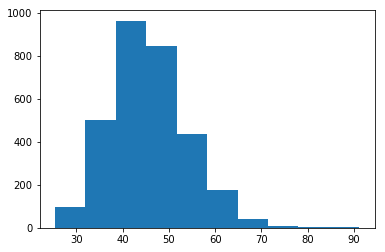

In [197]:
# characteristic radius
np.random.seed(1)
mu_rc, sigma_rc = 3.8, 0.18 # mean and standard deviation
s_rc = np.random.lognormal(mu_rc, sigma_rc, AAA.shape[0])
plt.hist(s_rc)

(array([ 440.,  398.,  351.,  356.,  309.,  271.,  257.,  210.,  247.,  239.]),
 array([ 0.7004377 ,  0.77031348,  0.84018926,  0.91006504,  0.97994082,
         1.0498166 ,  1.11969239,  1.18956817,  1.25944395,  1.32931973,
         1.39919551]),
 <a list of 10 Patch objects>)

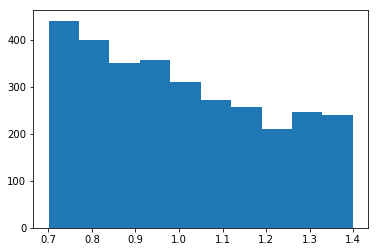

In [199]:
np.random.seed(2)
s_ms_log = np.random.uniform(np.log10(0.7),np.log10(1.4),AAA.shape[0])
s_ms=10**s_ms_log
plt.hist(s_ms)

In [200]:
YYY=np.vstack((s_md,s_rc,s_ms)).T
YYY

array([[  0.5766294 ,  59.88237165,   0.94699042],
       [  0.18088996,  40.04019584,   0.7126932 ],
       [  0.29579971,  40.6471647 ,   1.02462025],
       ..., 
       [  0.17034901,  43.68711949,   1.03848893],
       [  0.08964091,  50.69860625,   0.92340437],
       [  0.70958633,  39.15996474,   0.89568765]])

(array([ 321.,  309.,  298.,  305.,  270.,  297.,  337.,  300.,  312.,  329.]),
 array([ 6.000439  ,  6.10033151,  6.20022401,  6.30011651,  6.40000902,
         6.49990152,  6.59979403,  6.69968653,  6.79957903,  6.89947154,
         6.99936404]),
 <a list of 10 Patch objects>)

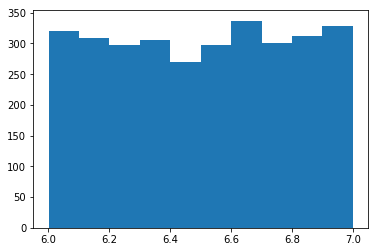

In [201]:
np.random.seed(4)
s_tg_log = np.random.uniform(6,7,AAA.shape[0])
s_tg=10**s_tg_log
plt.hist(np.log10(s_tg))

(array([   7.,   54.,  207.,  525.,  799.,  799.,  485.,  157.,   41.,    4.]),
 array([-0.79164442, -0.63500897, -0.47837352, -0.32173807, -0.16510262,
        -0.00846717,  0.14816828,  0.30480373,  0.46143917,  0.61807462,
         0.77471007]),
 <a list of 10 Patch objects>)

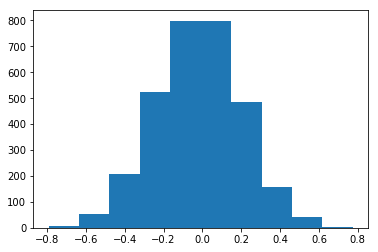

In [202]:
# metallicity
np.random.seed(5)
mu_mt, sigma_mt = -0.02, 0.22 # mean and standard deviation
s_mt = np.random.normal(mu_mt, sigma_mt, AAA.shape[0])
plt.hist(s_mt)

In [216]:
qnew=np.array([])
gamma=1
for i in range(YYY.shape[0]):
    ac=YYY[i,1]
    ms=YYY[i,2]
    md=YYY[i,0]
    amin=ac*((7./4.-gamma)/(2.-gamma))**(1./(2.-gamma))
    sigmag=(2.-gamma)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    qnew=np.append(qnew,1.24e5*(amin**(gamma-7./4.))*(ac**(-gamma))*(ms)*np.exp((amin/ac)**(2.-gamma))/sigmag)
filter=qnew>1
print "Rechazados: "+str(len(qnew)-filter.sum())
YYYN=YYY[filter]
s_mtn=s_mt[filter]
s_tgn=s_tg[filter]

Rechazados: 112


In [217]:
gama=np.ones(YYYN.shape[0])
cmigI=np.ones(YYYN.shape[0])*0.1
Apert=np.ones(YYYN.shape[0])*0.
Fpert=np.ones(YYYN.shape[0])*1.
Tfin=np.ones(YYYN.shape[0])*3.e7
Verb=False

In [206]:
params=np.vstack((YYYN.T,s_mtn,s_tgn,gama,cmigI,Apert,Fpert,Tfin)).T

In [207]:
f = open('parameters_yam_qc.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n")
for i in range(len(params)):
        f.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%(tuple(params[i])+(Verb,))) 
f.close()

In [218]:
# 7/4=2 en qold
qold=np.array([]) 
gamma=1
for i in range(YYY.shape[0]):
    ac=YYY[i,1]
    ms=YYY[i,2]
    md=YYY[i,0]
    amin=ac*((7./4.-gamma)/(2.-gamma))**(1./(2.-gamma))
    sigmag=(2.-gamma)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    qold=np.append(qold,1.24e5*(amin**(gamma-2.))*(ac**(-gamma))*(ms)*np.exp((amin/ac)**(2.-gamma))/sigmag)
filtero=qold>1
print "Rechazados: "+str(len(qold)-filtero.sum())
YYYO=YYY[filtero]
s_mto=s_mt[filtero]
s_tgo=s_tg[filtero]

Rechazados: 671


In [219]:
gama=np.ones(YYYO.shape[0])
cmigI=np.ones(YYYO.shape[0])*0.1
Apert=np.ones(YYYO.shape[0])*0.
Fpert=np.ones(YYYO.shape[0])*1.
Tfin=np.ones(YYYO.shape[0])*3.e7
Verb=False

In [220]:
paramso=np.vstack((YYYO.T,s_mto,s_tgo,gama,cmigI,Apert,Fpert,Tfin)).T

In [221]:
f = open('parameters_yam_qo.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n")
for i in range(len(paramso)):
        f.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%(tuple(paramso[i])+(Verb,))) 
f.close()

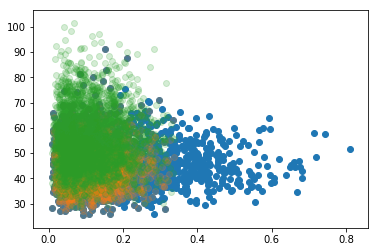

In [222]:
# md vs rc
plt.scatter(YYYN[:,0],YYYN[:,1]) # correct q
plt.scatter(YYYO[:,0],YYYO[:,1],alpha=0.2) # incorrect 1
plt.scatter(AAA[:,0],AAA[:,1],alpha=0.2) # from yamila

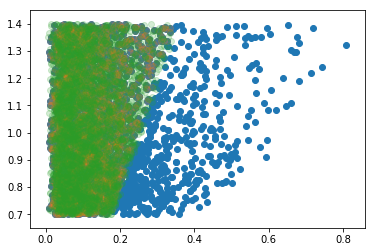

In [213]:
# md vs ms
plt.scatter(YYYN[:,0],YYYN[:,2]) # correct q
plt.scatter(YYYO[:,0],YYYO[:,2],alpha=0.2) # incorrect 1
plt.scatter(AAA[:,0],AAA[:,2],alpha=0.2) # from yamila

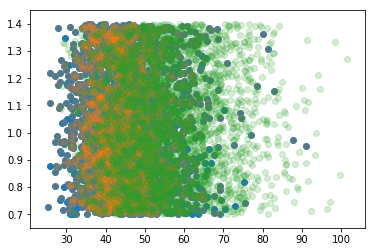

In [214]:
# rc vs ms
plt.scatter(YYYN[:,1],YYYN[:,2]) # correct q
plt.scatter(YYYO[:,1],YYYO[:,2],alpha=0.2) # incorrect 1
plt.scatter(AAA[:,1],AAA[:,2],alpha=0.2) # from yamila

In [215]:
ix=np.arange(len(qnew))
news=ix[qnew>1]
olds=ix[qold>1]
print "Systems in new Q list = ", news.shape[0]
print "Systems in old Q list = ", news[np.in1d(news,olds)].shape[0]
print "Systems in old Q list that are also in new Q list = ",olds.shape[0] # are all olds in new list? if so, proceed
ixn=np.arange(len(news))
ixo=ixn[np.in1d(news,olds)] # filter to be applied to new 

Systems in new Q list =  2966
Systems in old Q list =  2407
Systems in old Q list that are also in new Q list =  2407


In [223]:
np.savetxt("qoldsystems.txt",ixo) # sistemas seleccionados con bias de q

array([   3,    5,    6, ..., 2963, 2964, 2965])

In [278]:
gama=np.ones(YYYN.shape[0])
cmigI=np.ones(YYYN.shape[0])*0.1
Apert=np.ones(YYYN.shape[0])*0.1 # pinilla 2011 pg 10 https://arxiv.org/pdf/1112.2349.pdf
Fpert=np.ones(YYYN.shape[0])*1.
Tfin=np.ones(YYYN.shape[0])*2.1e7
Verb=False 
params=np.vstack((YYYN.T,s_mtn,s_tgn,gama,cmigI,Apert,Fpert,Tfin)).T
f = open('parameters_yam_lo_per.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n")
for i in range(len(params)):
        f.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%(tuple(params[i])+(Verb,))) 
f.close()

In [ ]:
gama=np.ones(YYYN.shape[0])
cmigI=np.ones(YYYN.shape[0])*0.1
Apert=np.ones(YYYN.shape[0])*0.3 # pinilla 2011 pg 10 https://arxiv.org/pdf/1112.2349.pdf
Fpert=np.ones(YYYN.shape[0])*1.
Tfin=np.ones(YYYN.shape[0])*2.1e7
Verb=False 
params=np.vstack((YYYN.T,s_mtn,s_tgn,gama,cmigI,Apert,Fpert,Tfin)).T
f = open('parameters_yam_hi_per.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n")
for i in range(len(params)):
        f.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%(tuple(params[i])+(Verb,))) 
f.close()

# Generating a Yamila-like parameters.in for low-mass stars

In [2]:
AAA=np.loadtxt("../legacy_input/discos-estables-gama1.dat")

In [3]:
np.random.seed(0) # disk mass
mu_md, sigma_md = -2.05, 0.85 # mean and standard deviation
s_md = np.random.lognormal(mu_md, sigma_md, AAA.shape[0])
np.random.seed(1) # characteristic radius
mu_rc, sigma_rc = 3.8, 0.18 # mean and standard deviation
s_rc = np.random.lognormal(mu_rc, sigma_rc, AAA.shape[0])
np.random.seed(2) # stellar mass
s_ms_log = np.random.uniform(np.log10(0.1),np.log10(1.),AAA.shape[0])
s_ms=10**s_ms_log
np.random.seed(4) # tau gas
s_tg_log = np.random.uniform(6,7,AAA.shape[0])
s_tg=10**s_tg_log
np.random.seed(5) # metallicity
mu_mt, sigma_mt = -0.02, 0.22 # mean and standard deviation
s_mt = np.random.normal(mu_mt, sigma_mt, AAA.shape[0])

s_md=s_md*s_ms # use disk mass distribution as disk mass fraction (wrt stellar mass)
YYY=np.vstack((s_md,s_rc,s_ms)).T
# check for Q > 1 stability
qnew=np.array([])
gamma=1.5
for i in range(YYY.shape[0]):
    ac=YYY[i,1]
    ms=YYY[i,2]
    md=YYY[i,0]
    amin=ac*((7./4.-gamma)/(2.-gamma))**(1./(2.-gamma))
    sigmag=(2.-gamma)*md*2.e33/(2.*np.pi*(ac*1.5e13)**2.)
    qnew=np.append(qnew,1.24e5*(amin**(gamma-7./4.))*(ac**(-gamma))*(ms)*np.exp((amin/ac)**(2.-gamma))/sigmag)
filter=qnew>1
print "Rechazados: "+str(len(qnew)-filter.sum())
YYYN=YYY[filter]
s_mtn=s_mt[filter]
s_tgn=s_tg[filter]

Rechazados: 11


In [4]:
gama=np.ones(YYYN.shape[0])*gamma
cmigI=np.ones(YYYN.shape[0])*0.1
Apert=np.ones(YYYN.shape[0])*0.0 # pinilla 2011 pg 10 https://arxiv.org/pdf/1112.2349.pdf
Fpert=np.ones(YYYN.shape[0])*1.
Tfin=np.ones(YYYN.shape[0])*1.1e7
Verb=False 
params=np.vstack((YYYN.T,s_mtn,s_tgn,gama,cmigI,Apert,Fpert,Tfin)).T
f = open('parameters_pab_np.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n")
for i in range(len(params)):
        f.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%(tuple(params[i])+(Verb,))) 
f.close()

In [5]:
gama=np.ones(YYYN.shape[0])*gamma
cmigI=np.ones(YYYN.shape[0])*0.1
Apert=np.ones(YYYN.shape[0])*0.1 # pinilla 2011 pg 10 https://arxiv.org/pdf/1112.2349.pdf
Fpert=np.ones(YYYN.shape[0])*1.
Tfin=np.ones(YYYN.shape[0])*1.1e7
Verb=False 
params=np.vstack((YYYN.T,s_mtn,s_tgn,gama,cmigI,Apert,Fpert,Tfin)).T
f = open('parameters_pab_lp.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n")
for i in range(len(params)):
        f.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%(tuple(params[i])+(Verb,))) 
f.close()

In [6]:
gama=np.ones(YYYN.shape[0])*gamma
cmigI=np.ones(YYYN.shape[0])*0.1
Apert=np.ones(YYYN.shape[0])*0.3 # pinilla 2011 pg 10 https://arxiv.org/pdf/1112.2349.pdf
Fpert=np.ones(YYYN.shape[0])*1.
Tfin=np.ones(YYYN.shape[0])*1.1e7
Verb=False 
params=np.vstack((YYYN.T,s_mtn,s_tgn,gama,cmigI,Apert,Fpert,Tfin)).T
f = open('parameters_pab_hp.in', 'w')
f.write("md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb\n")
for i in range(len(params)):
        f.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%(tuple(params[i])+(Verb,))) 
f.close()

# Sample analysis of finalresults.csv (from pastefiles.sh)

In [2]:
dff=pd.read_csv("finalresults.csv") # for first naive run in sn_pert_0.7_1.0

In [4]:
dff.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199994,20000001.0,13.223115,0.0,1.517274,1.769731,2.000000e+33,20.0,4.868963,353.677651,0.1,1.0,0.7,1.0,0.1,0.0,6859750.0
1,0,199994,20000001.0,15.010975,0.0,0.724916,1.383338,2.000000e+33,20.0,4.868963,353.677651,0.1,1.0,0.7,1.0,0.1,0.0,6859750.0
2,0,199994,20000001.0,16.488491,0.0,0.227231,0.939953,2.000000e+33,20.0,4.868963,353.677651,0.1,1.0,0.7,1.0,0.1,0.0,6859750.0
3,0,199994,20000001.0,18.527000,0.0,0.182963,0.874774,2.000000e+33,20.0,4.868963,353.677651,0.1,1.0,0.7,1.0,0.1,0.0,6859750.0
4,0,199994,20000001.0,19.508361,0.0,0.490444,1.214827,2.000000e+33,20.0,4.868963,353.677651,0.1,1.0,0.7,1.0,0.1,0.0,6859750.0


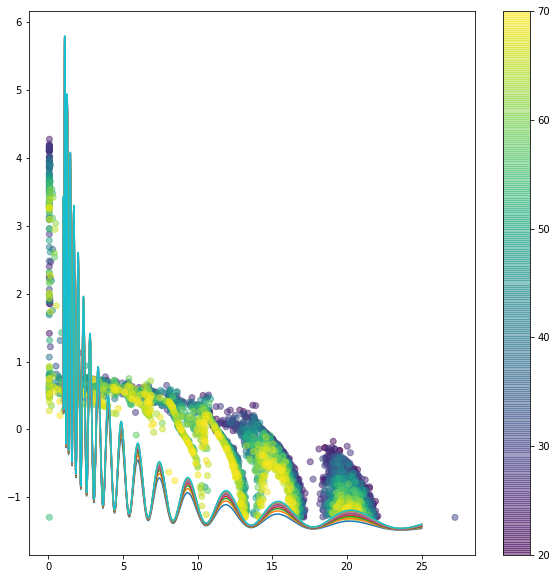

In [41]:
a=np.linspace(1,25,1000)
apert=0.7
fpert=1.
gama=1.
plt.figure(figsize=(10,10))
plt.scatter(dff['a(i)'],np.log10(dff['emepla(i)/emet']),c=dff.rc,alpha=0.5)
plt.colorbar()
for rc in np.linspace(20,70,10):
    plt.plot(a,-1.5+5*((a**(-gama)*np.exp(-(a/rc)**(2.-gama))*(1+apert*np.cos(2.*np.pi*a/(fpert*0.03361386903*a**(5./4.)))))))

In [9]:
np.unique(dff.rc).shape

(307,)

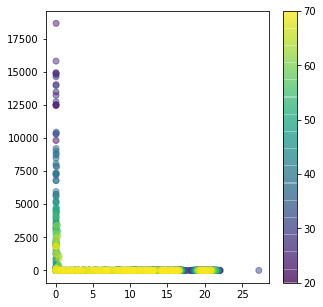

In [150]:
a=np.linspace(1,25,1000)
apert=0.7
fpert=1.
gama=1.
plt.figure(figsize=(5,5))
plt.scatter(dff['a(i)'],dff['emepla(i)/emet'],c=dff.rc,alpha=0.5)
plt.colorbar()

In [155]:
dpar=pd.read_csv("../parameters_yam_orig.in") # for first yam run based on original input list yam_orig_input

In [156]:
dpar.head()

,md,ac,ms,metal,tgas,gama,cmigI,Apert,Fpert,Tfin,Verb
0,0.100921,58.23233,0.796151,0.020696,6859750.19,1.0,0.1,0.0,1.0,30000000.0,False
1,0.130681,38.93514,0.846637,-0.191218,2483542.33,1.0,0.1,0.0,1.0,30000000.0,False
2,0.142263,49.38286,0.725120,-0.146010,3972741.23,1.0,0.1,0.0,1.0,30000000.0,False
3,0.200524,59.34350,1.038255,-0.184813,5151918.90,1.0,0.1,0.0,1.0,30000000.0,False
4,0.252361,50.35551,1.209874,-0.322368,6404398.12,1.0,0.1,0.0,1.0,30000000.0,False


In [157]:
dpar.shape

(1084, 11)

In [22]:
dff=pd.read_csv("../pab15_np/finalresults.csv")

In [32]:
len(dff)

22315

In [37]:
dff.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,100000,10000001.0,6.889261,0.0,0.639843,1.3260121373796603,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0
1,0,100000,10000001.0,8.412058,0.0,0.457761,1.1863391737011957,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0
2,0,100000,10000001.0,10.254479,0.0,0.256871,0.97891832347698415,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0
3,0,100000,10000001.0,11.115438,0.0,0.178099,0.86652984057108562,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0
4,0,100000,10000001.0,14.021104,0.0,0.064609,0.61821391002212955,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0


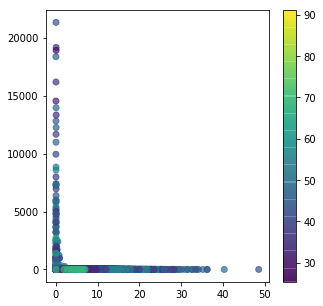

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(dff['a(i)'],dff['emepla(i)/emet'],c=dff.rc,alpha=0.7)
plt.colorbar()

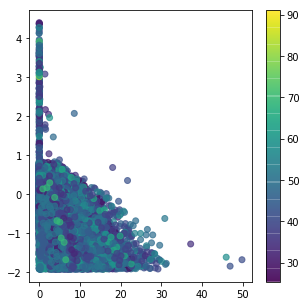

In [60]:
dffl=pd.read_csv("../pab15_lp/finalresults.csv")
plt.figure(figsize=(5,5))
plt.scatter(dffl['a(i)'],np.log10(dffl['emepla(i)/emet']),c=dffl.rc,alpha=0.7)
plt.colorbar()

In [24]:
dff['emepla(i)/emet'].min()

0.012003831505104907

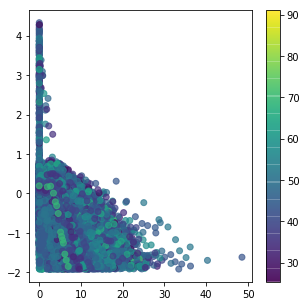

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(dff['a(i)'],np.log10(dff['emepla(i)/emet']),c=dff.rc,alpha=0.7)
plt.colorbar()

(array([ 6580.,  5602.,  5980.,  3687.,   270.,    38.,    48.,    40.,
           41.,    29.]),
 array([-1.92068011, -1.2957136 , -0.6707471 , -0.0457806 ,  0.57918591,
         1.20415241,  1.82911892,  2.45408542,  3.07905193,  3.70401843,
         4.32898494]),
 <a list of 10 Patch objects>)

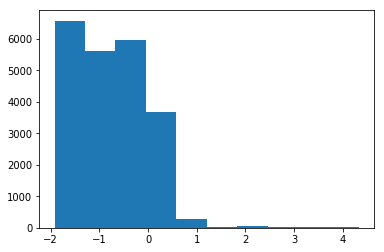

In [26]:
plt.hist(np.log10(dff['emepla(i)/emet']))

(array([ 9675.,  2427.,  1681.,  1187.,   890.,   696.,   664.,   507.,
          447.,   419.]),
 array([ 0.01200383,  0.11078679,  0.20956975,  0.3083527 ,  0.40713566,
         0.50591862,  0.60470158,  0.70348454,  0.80226749,  0.90105045,
         0.99983341]),
 <a list of 10 Patch objects>)

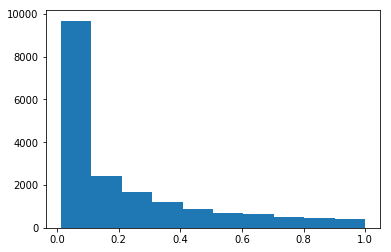

In [41]:
plt.hist((dff['emepla(i)/emet'][dff['emepla(i)/emet']<1]))

In [27]:
np.percentile(dff['emepla(i)/emet'], 95)

2.3169342344292327

In [28]:
100.*len(dff[dff['emepla(i)/emet']<10])/len(dff) # more than 2 sigma of all planets are below 10 earth masses

99.09029800582567

In [56]:
npl=[]
ms=[]
rc=[]
md=[]

for i in np.unique(dff.ident):    
    filter=dff.ident==i
    npl+=[filter.sum()]
    ms+=[dff.emestar[filter].iloc[0]]
    rc+=[dff.rc[filter].iloc[0]]
    md+=[dff.emed[filter].iloc[0]]
npl=np.array(npl)
ms=np.array(ms)    


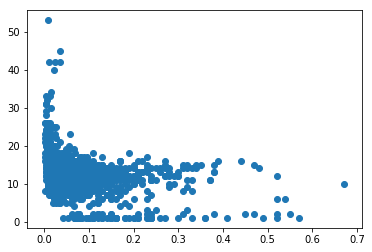

In [57]:
plt.scatter(md,npl)

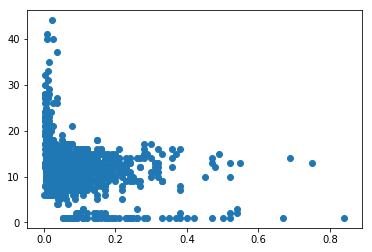

In [61]:
npll=[]
msl=[]
rcl=[]
mdl=[]
for i in np.unique(dffl.ident):    
    filter=dffl.ident==i
    npll+=[filter.sum()]
    msl+=[dffl.emestar[filter].iloc[0]]
    rcl+=[dffl.rc[filter].iloc[0]]
    mdl+=[dffl.emed[filter].iloc[0]]
npll=np.array(npll)
msl=np.array(msl)    
plt.scatter(mdl,npll)

(array([  1.31100000e+03,   3.03000000e+02,   1.09000000e+02,
          4.50000000e+01,   3.00000000e+01,   1.20000000e+01,
          3.00000000e+00,   8.00000000e+00,   3.00000000e+00,
          1.00000000e+00]),
 array([ 0.0016 ,  0.06844,  0.13528,  0.20212,  0.26896,  0.3358 ,
         0.40264,  0.46948,  0.53632,  0.60316,  0.67   ]),
 <a list of 10 Patch objects>)

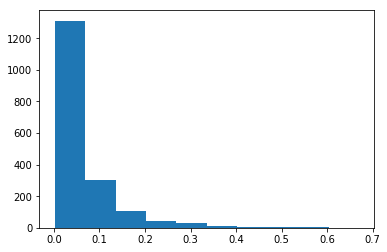

In [58]:
plt.hist(md)

(array([  77.,   32.,  106.,  567.,  458.,  409.,   95.,   23.,   31.,
          11.,    2.,    5.,    3.,    0.,    0.,    4.,    1.,    0.,
           0.,    1.]),
 array([  1. ,   3.6,   6.2,   8.8,  11.4,  14. ,  16.6,  19.2,  21.8,
         24.4,  27. ,  29.6,  32.2,  34.8,  37.4,  40. ,  42.6,  45.2,
         47.8,  50.4,  53. ]),
 <a list of 20 Patch objects>)

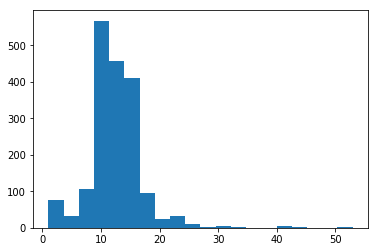

In [47]:
plt.hist(npl,bins=20)

In [29]:
# cut off giant planets
dfter=dff[dff['emepla(i)/emet']<10.]
dfter.head()

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,100000,10000001.0,6.889261,0.0,0.639843,1.3260121373796603,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0
1,0,100000,10000001.0,8.412058,0.0,0.457761,1.1863391737011957,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0
2,0,100000,10000001.0,10.254479,0.0,0.256871,0.97891832347698415,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0
3,0,100000,10000001.0,11.115438,0.0,0.178099,0.86652984057108562,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0
4,0,100000,10000001.0,14.021104,0.0,0.064609,0.61821391002212955,5.457891e+32,59.88237,1.971852,31.561645,0.16,1.5,0.0,1.0,0.1,0.07707,9268935.0


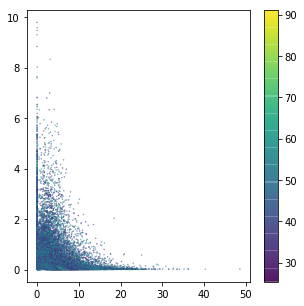

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(dfter['a(i)'],dfter['emepla(i)/emet'],c=dfter.rc,alpha=0.7,s=0.2)
plt.colorbar()

In [31]:
len(dfter)

22112

In [43]:
# reduce.py
import pandas as pd
import numpy as np
import sys
resfile=sys.argv[1]
#dff=pd.read_csv(resfile)
header=np.array(["ident, com, nplanets, massbudget, mass efficiency, sigmag0, md, rc, ms"])
#np.savetxt("header.txt",header,fmt='%s')
dfter=dff[dff['emepla(i)/emet']<10.]
rdata=np.zeros((len(np.unique(dfter.ident)),9))
kk=0
for i in np.unique(dfter.ident):    
    filter=dfter.ident==i
    com=((dfter[filter]['emepla(i)/emet']*dfter[filter]['a(i)']).sum())/dfter[filter]['a(i)'].sum()
    npl=filter.sum()
    mbud=(dfter[filter]['emepla(i)/emet']).sum()
    effm=mbud*3e-6/(dfter.emed[filter].iloc[0])
    sigmag0=dfter.sigmag_0[filter].iloc[0]
    md=dfter.emed[filter].iloc[0]
    rc=dfter.rc[filter].iloc[0]
    ms=dfter.emestar[filter].iloc[0]
    rdata[kk,:]=i,com,npl,mbud,effm,sigmag0,md,rc,ms    
    kk=kk+1
#np.savetxt("terrestrial.txt",rdata)
dfgia=dff[dff['emepla(i)/emet']>10.]
rdatag=np.zeros((len(np.unique(dfgia.ident)),9))
kk=0
for i in np.unique(dfgia.ident):    
    filter=dfgia.ident==i
    com=((dfgia[filter]['emepla(i)/emet']*dfgia[filter]['a(i)']).sum())/dfgia[filter]['a(i)'].sum()
    npl=filter.sum()
    mbud=(dfgia[filter]['emepla(i)/emet']).sum()
    effm=mbud*3e-6/(dfgia.emed[filter].iloc[0])
    sigmag0=dfgia.sigmag_0[filter].iloc[0]
    md=dfgia.emed[filter].iloc[0]
    rc=dfgia.rc[filter].iloc[0]
    ms=dfgia.emestar[filter].iloc[0]
    rdatag[kk,:]=i,com,npl,mbud,effm,sigmag0,md,rc,ms    
    kk=kk+1
#np.savetxt("giants.txt",rdatag)
print "Total systems: "+str(len(np.unique(dff.ident)))
print "Systems with giant planets: "+str(kk-1)
print "%.1f percent of all planets are below 10 earth masses" %(100.*len(dff[dff['emepla(i)/emet']<10])/len(dff))

Total systems: 1825
Systems with giant planets: 184
99.1 percent of all planets are below 10 earth masses


In [13]:
#"ident, com, nplanets, massbudget, mass efficiency, sigmag0, md, rc, ms"
tdata=np.loadtxt("../pab15_np/terrestrial.txt")

In [44]:
tdatao=tdata[np.in1d(tdata[:,0],ixo)]

NameError: name 'ixo' is not defined

(array([  57.,   35.,  114.,  583.,  459.,  387.,   89.,   23.,   31.,
          11.,    2.,    5.,    3.,    0.,    0.,    4.,    1.,    0.,
           0.,    1.]),
 array([  1. ,   3.6,   6.2,   8.8,  11.4,  14. ,  16.6,  19.2,  21.8,
         24.4,  27. ,  29.6,  32.2,  34.8,  37.4,  40. ,  42.6,  45.2,
         47.8,  50.4,  53. ]),
 <a list of 20 Patch objects>)

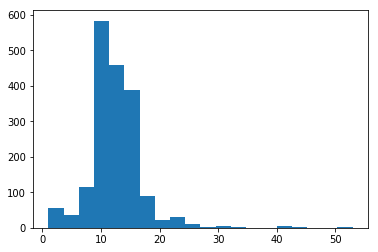

In [20]:
plt.hist(tdata[:,2],bins=20)

In [16]:
gdata=np.loadtxt("../pab15_np/giant.txt")

(array([ 22.,  17.,  20.,  13.,  13.,  21.,  14.,  20.,  25.,  20.]),
 array([  2.06078157e+32,   3.84155475e+32,   5.62232792e+32,
          7.40310110e+32,   9.18387428e+32,   1.09646475e+33,
          1.27454206e+33,   1.45261938e+33,   1.63069670e+33,
          1.80877402e+33,   1.98685133e+33]),
 <a list of 10 Patch objects>)

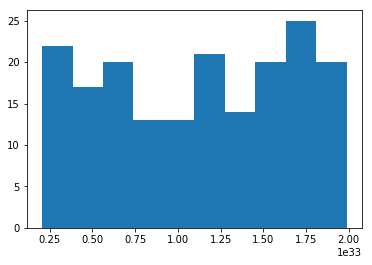

In [21]:
plt.hist(gdata[:,8],bins=10)

In [ ]:
plt.hist(tdata[:,2],bins=20)

In [11]:
gdata

array([[  3.00000000e+00,   2.97089615e-02,   1.00000000e+00, ...,
          2.40000000e-01,   3.68503685e+01,   5.44944644e+32],
       [  9.00000000e+00,   8.49238817e-02,   1.00000000e+00, ...,
          3.40000000e-02,   4.27390633e+01,   3.69706661e+32],
       [  1.50000000e+01,   2.53809812e-02,   1.00000000e+00, ...,
          1.00000000e-01,   3.66722221e+01,   1.22001493e+33],
       ..., 
       [  1.98600000e+03,   5.29603822e-02,   2.00000000e+00, ...,
          3.20000000e-01,   4.94501572e+01,   1.53298581e+33],
       [  2.03600000e+03,   2.06738141e-02,   1.00000000e+00, ...,
          5.20000000e-02,   4.47958717e+01,   1.21785700e+33],
       [  2.16300000e+03,   2.57389370e-02,   1.00000000e+00, ...,
          1.90000000e-01,   5.40304413e+01,   1.45082545e+33]])

(array([ 0.3836639 ,  0.73204836,  1.30092932,  1.50819603,  1.09366262,
         0.61298026,  0.27782558,  0.07496881,  0.03086951,  0.01322979]),
 array([ 0.05158399,  0.2174662 ,  0.3833484 ,  0.54923061,  0.71511281,
         0.88099502,  1.04687722,  1.21275943,  1.37864163,  1.54452384,
         1.71040604]),
 <a list of 10 Patch objects>)

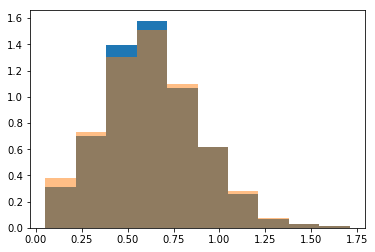

In [255]:
plt.hist(tdata[:,1],normed=True)
plt.hist(tdatao[:,1],normed=True,alpha=0.5)

(array([ 0.00322733,  0.02409742,  0.12909333,  0.07186196,  0.03141271,
         0.01312449,  0.0058092 ,  0.00882138,  0.00451827,  0.00215156]),
 array([  1. ,   4.4,   7.8,  11.2,  14.6,  18. ,  21.4,  24.8,  28.2,
         31.6,  35. ]),
 <a list of 10 Patch objects>)

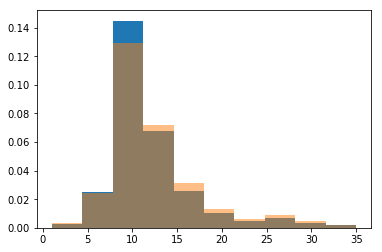

In [256]:
plt.hist(tdata[:,2],normed=True)
plt.hist(tdatao[:,2],normed=True,alpha=0.5)

(array([ 0.02415853,  0.04615655,  0.07129714,  0.05774479,  0.03594318,
         0.0180698 ,  0.01021336,  0.00314257,  0.00098205,  0.00078564]),
 array([  0.05158399,   3.77606722,   7.50055044,  11.22503366,
         14.94951688,  18.6740001 ,  22.39848333,  26.12296655,
         29.84744977,  33.57193299,  37.29641622]),
 <a list of 10 Patch objects>)

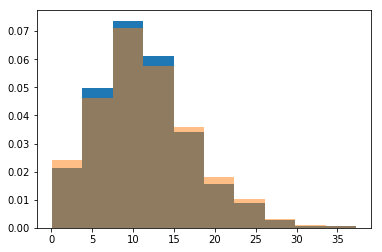

In [254]:
plt.hist(tdata[:,3],normed=True)
plt.hist(tdatao[:,3],normed=True,alpha=0.5)

(array([ 1616.82859276,  1269.76067494,   550.22962581,   248.30875421,
           93.11578283,    50.790427  ,    19.75183272,     5.64338078,
            0.        ,     2.82169039]),
 array([  1.81031099e-06,   2.61062318e-04,   5.20314324e-04,
          7.79566331e-04,   1.03881834e-03,   1.29807034e-03,
          1.55732235e-03,   1.81657436e-03,   2.07582636e-03,
          2.33507837e-03,   2.59433038e-03]),
 <a list of 10 Patch objects>)

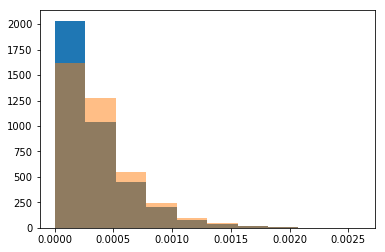

In [257]:
plt.hist(tdata[:,4],normed=True)
plt.hist(tdatao[:,4],normed=True,alpha=0.5)

In [265]:
gdata=np.loadtxt("../giants.txt")
gdatao=gdata[np.in1d(gdata[:,0],ixo)]

(array([  2.42377074e-04,   6.17462507e-05,   2.76475749e-05,
          1.84317166e-05,   1.38237875e-05,   9.21585831e-06,
          8.29427248e-06,   6.45110082e-06,   5.52951499e-06,
          5.52951499e-06]),
 array([  1.01810147e+01,   2.51615359e+03,   5.02212617e+03,
          7.52809875e+03,   1.00340713e+04,   1.25400439e+04,
          1.50460165e+04,   1.75519891e+04,   2.00579616e+04,
          2.25639342e+04,   2.50699068e+04]),
 <a list of 10 Patch objects>)

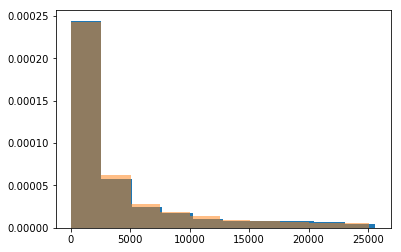

In [266]:
plt.hist(gdata[:,1],normed=True)
plt.hist(gdatao[:,1],normed=True,alpha=0.5)

(array([ 2.43264049,  0.        ,  0.        ,  0.75442648,  0.        ,
         0.        ,  0.1308699 ,  0.        ,  0.        ,  0.01539646]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

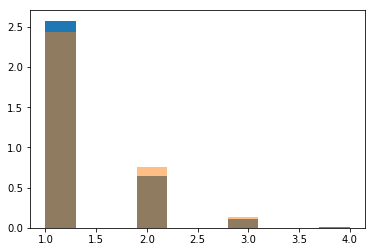

In [267]:
plt.hist(gdata[:,2],normed=True)
plt.hist(gdatao[:,2],normed=True,alpha=0.5)

(array([  1.62218157e-04,   3.89323578e-05,   2.53060326e-05,
          1.88173063e-05,   1.68706884e-05,   9.08421682e-06,
          6.48872630e-06,   1.29774526e-06,   1.29774526e-06,
          6.48872630e-07]),
 array([  1.01810147e+01,   3.56938311e+03,   7.12858520e+03,
          1.06877873e+04,   1.42469894e+04,   1.78061915e+04,
          2.13653936e+04,   2.49245957e+04,   2.84837978e+04,
          3.20429999e+04,   3.56022019e+04]),
 <a list of 10 Patch objects>)

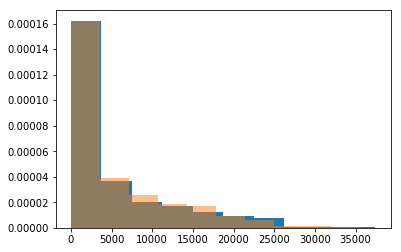

In [269]:
plt.hist(gdata[:,3],normed=True)
plt.hist(gdatao[:,3],normed=True,alpha=0.5)

(array([ 7.33146538,  2.1086073 ,  1.75176607,  1.10296382,  1.07052371,
         0.38928135,  0.16220056,  0.09732034,  0.        ,  0.03244011]),
 array([  1.26398423e-04,   7.13181625e-02,   1.42509927e-01,
          2.13701691e-01,   2.84893455e-01,   3.56085219e-01,
          4.27276983e-01,   4.98468747e-01,   5.69660511e-01,
          6.40852275e-01,   7.12044039e-01]),
 <a list of 10 Patch objects>)

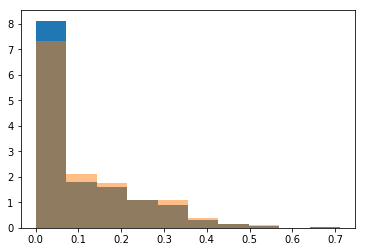

In [270]:
plt.hist(gdata[:,4],normed=True)
plt.hist(gdatao[:,4],normed=True,alpha=0.5)

In [279]:
np.savetxt("terr_qyam.txt",tdatao)
np.savetxt("gian_qyam.txt",gdatao)